<a href="https://colab.research.google.com/github/mmadyda/OpenCV/blob/master/OpenCV_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
import matplotlib.pyplot as plt

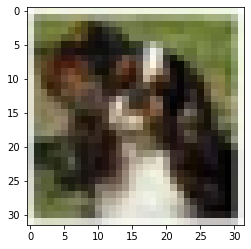

In [9]:
plt.imshow(x_train[500])

In [10]:
x_train.max()

255

In [0]:
x_train = x_train/ 255.0
x_test = x_test/255.0

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [0]:
from keras.models import  Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [22]:
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 17s 342us/step - loss: 1.5140 - accuracy: 0.4561
Epoch 2/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.1537 - accuracy: 0.5954
Epoch 3/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.0055 - accuracy: 0.6475
Epoch 4/10
50000/50000 [==============================] - 11s 227us/step - loss: 0.9047 - accuracy: 0.6896
Epoch 5/10
50000/50000 [==============================] - 11s 227us/step - loss: 0.8247 - accuracy: 0.7161
Epoch 6/10
50000/50000 [==============================] - 11s 226us/step - loss: 0.7665 - accuracy: 0.7407
Epoch 7/10
50000/50000 [==============================] - 12s 239us/step - loss: 0.7133 - accuracy: 0.7571
Epoch 8/10
50000/50000 [==============================] - 11s 228us/step - loss: 0.6681 - accuracy: 0.7764
Epoch 9/10
50000/50000 [==============================] - 11s 230us/step - loss: 0.6294 - accuracy: 0.7879
Epoch 10/10
50000/50000 [============

In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 135us/step


[1.3525408108711243, 0.621399998664856]

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(x_test)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53      1000
           1       0.78      0.77      0.77      1000
           2       0.54      0.56      0.55      1000
           3       0.46      0.51      0.49      1000
           4       0.62      0.61      0.61      1000
           5       0.53      0.57      0.55      1000
           6       0.85      0.62      0.72      1000
           7       0.92      0.46      0.62      1000
           8       0.50      0.90      0.65      1000
           9       0.68      0.79      0.73      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.62     10000
weighted avg       0.66      0.62      0.62     10000

